# Model Building

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_column', None)

In [4]:
X_train = pd.read_csv('./data/xtrain.csv')
X_test = pd.read_csv('./data/xtest.csv')

In [5]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.25,0.00000,0.666667,1.0,1.0,0.75,0.666667,0.75,1.000000,0.002835,0.8,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.75,0.018692,1.000000,0.75,0.430183,1.0,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.50,0.03375,0.666667,1.0,0.5,0.50,0.666667,0.25,0.666667,0.142807,0.8,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.75,0.457944,0.666667,0.25,0.220028,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.333333,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.50,0.25750,1.000000,1.0,1.0,1.00,0.666667,0.25,1.000000,0.080794,0.8,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.666667,0.50,0.406206,1.0,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.25,0.00000,0.666667,1.0,1.0,0.75,0.666667,1.00,1.000000,0.255670,0.8,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.666667,0.50,0.362482,1.0,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.666667,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.50,0.17000,0.333333,1.0,0.5,0.50,0.666667,0.25,0.333333,0.086818,0.8,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.666667,0.50,0.406206,1.0,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.666667,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [6]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [7]:
features = pd.read_csv('./data/selected_features.csv', header=None)
features = [x for x in features[0]]
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive']

In [8]:
X_train = X_train[features]
X_test = X_test[features]

In [9]:
from sklearn.linear_model import Lasso

In [10]:
linear_model = Lasso(alpha=0.005, random_state=0)
linear_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
# we've log transformed the SalePrice
# we need to rescale it at the end to get the true MSE

In [17]:
def print_performance(model, X, y):
    pred = linear_model.predict(X)

    mse = mean_squared_error(
        np.exp(y),
        np.exp(pred), 
    )
    print(f"MSE : {mse}")
    print(f"RMSE: {mse**0.5}")

In [18]:
# Train
print_performance(linear_model, X_train, y_train)

MSE : 1087760192.4824877
RMSE: 32981.209687979725


In [19]:
# Test
print_performance(linear_model, X_test, y_test)

MSE : 1405334838.1956565
RMSE: 37487.79585672724


In [20]:
print(f"Avg. house price: {np.exp(y_train.median())}")

Avg. house price: 163000.00000000012


### Evaluate against ground truth

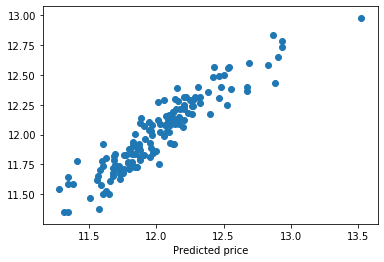

In [21]:
plt.scatter(y_test, linear_model.predict(X_test))
plt.xlabel("True price")
plt.xlabel("Predicted price")
plt.show()

### Error distribution

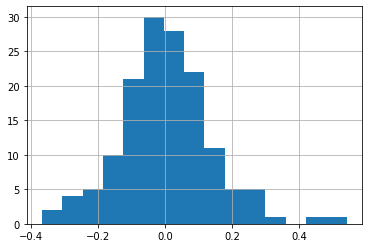

In [24]:
errors = y_test - linear_model.predict(X_test)
errors.hist(bins=15);

The errors show a near gaussian distribution which means our model is doing well

### Feature improtance

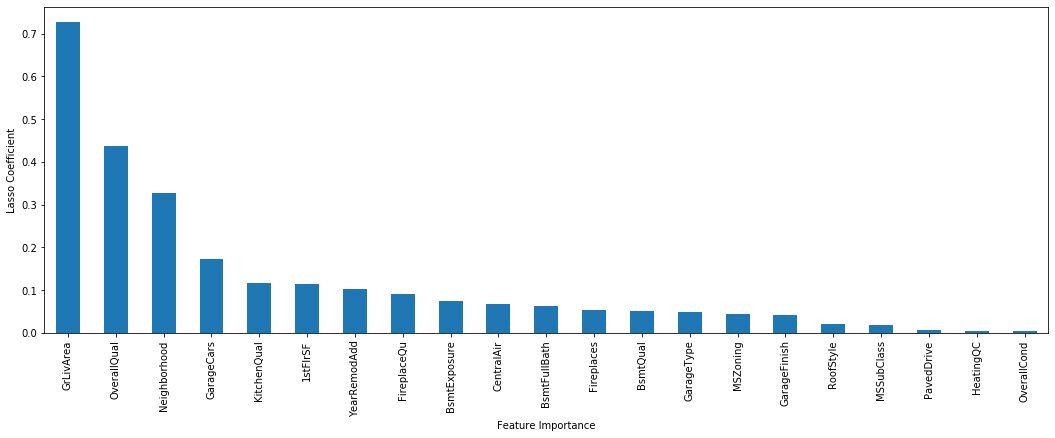

In [30]:
importance = pd.Series(np.abs(linear_model.coef_))
importance.index = features
importance.sort_values(inplace=True, ascending=False)

importance.plot.bar(figsize=(18, 6))
plt.ylabel("Lasso Coefficient")
plt.xlabel("Feature Importance")
plt.show();

In [31]:
importance[:5]

GrLivArea       0.726926
OverallQual     0.436018
Neighborhood    0.326324
GarageCars      0.171798
KitchenQual     0.116089
dtype: float64